In [46]:
setwd('/import/liujing/data2/')

###  valcano

In [47]:
diff = read.table('./sample35.pro.txt',header =T,sep = '\t',fill =NA)

In [48]:
diff = diff[!duplicated(diff$GeneName),]

In [49]:
head(diff,3)

,GeneName,Biotype,Gene,CI_normalize,CTRL_normalize,FoldChange,Log2FoldChange,pval,padj,Up.Down,Significant
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,TSPAN6,protein_coding,ENSG00000000003,3.138762,2.73203,1.148876,0.2002226,0.528271948,0.97927424,up,no
2,DPM1,protein_coding,ENSG00000000419,251.215222,179.06798,1.402904,0.4884165,0.000996971,0.05675136,up,no
3,SCYL3,protein_coding,ENSG00000000457,636.992180,544.75311,1.169323,0.2256731,0.109199545,0.62888501,up,no


In [113]:
padj = 0.05
foldChange = 0.5

In [114]:
diff$group = as.factor(ifelse(diff$padj	 < padj & abs(diff$Log2FoldChange	) > foldChange, 
                                 ifelse(diff$Log2FoldChange	> foldChange ,'Up','Down'),'NoSignifi'))
table(diff$group)


     Down NoSignifi        Up 
      150     16803       232 

In [115]:
res = na.omit(diff)

In [116]:
write.csv(res,file = 'sample35.diffgene.csv')

In [117]:
library(dplyr)

In [118]:
top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(padj, desc(Log2FoldChange)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(padj, desc(Log2FoldChange)) %>%
        head(0)
    )

In [119]:
library(ggpubr)
library(ggplot2)
    library(dplyr)
    library(ggrepel)
    library(ggplot2)
    library(cowplot)

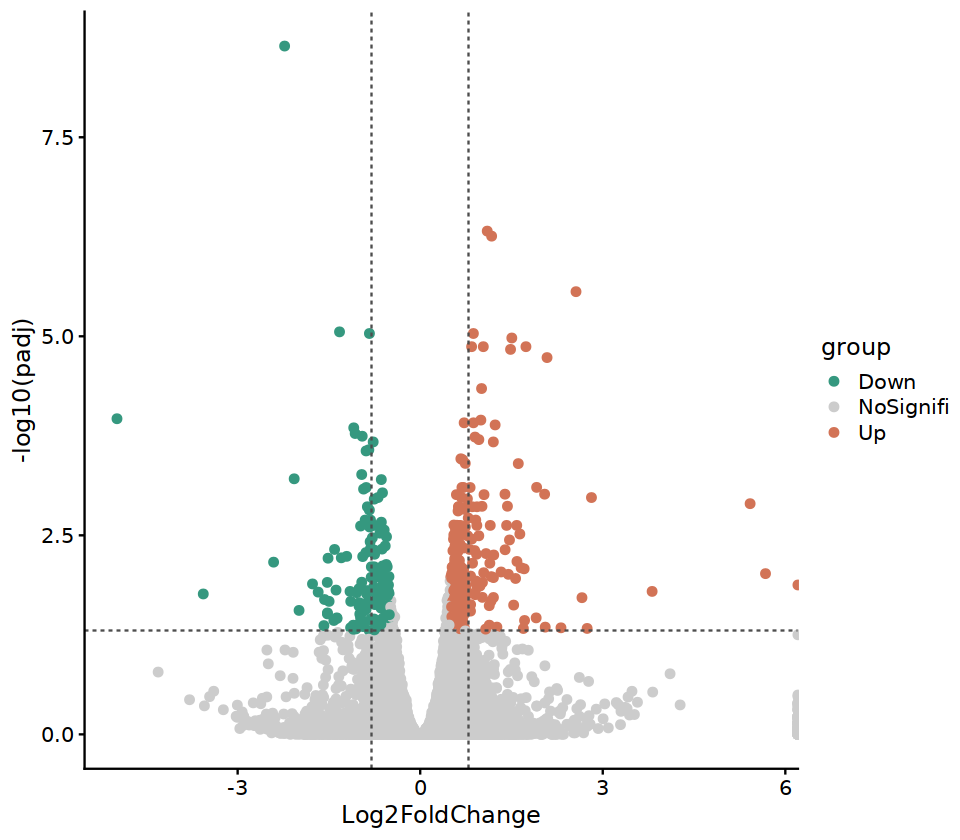

In [120]:
 ggplot(data=res,aes(x=Log2FoldChange,y=-log10(padj)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-.8,.8),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= Log2FoldChange,y= -log10(padj),label= rownames(top_5)))+
    scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 

In [121]:
ggsave('Figure1.35sample.valano.pdf',width = 8,height = 8)

In [122]:
library(clusterProfiler)
library(org.Hs.eg.db)

In [123]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  dplyr::select(GeneName)

In [124]:
gene_symbol <- bitr(geneID = jiaoji$GeneName,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 2,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.5,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji$GeneName, fromType = "SYMBOL", toType = c("ENTREZID"), :
"11.52% of input gene IDs are fail to map..."


In [125]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(5) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf

In [126]:
go = rbind(bp,cc,mf)

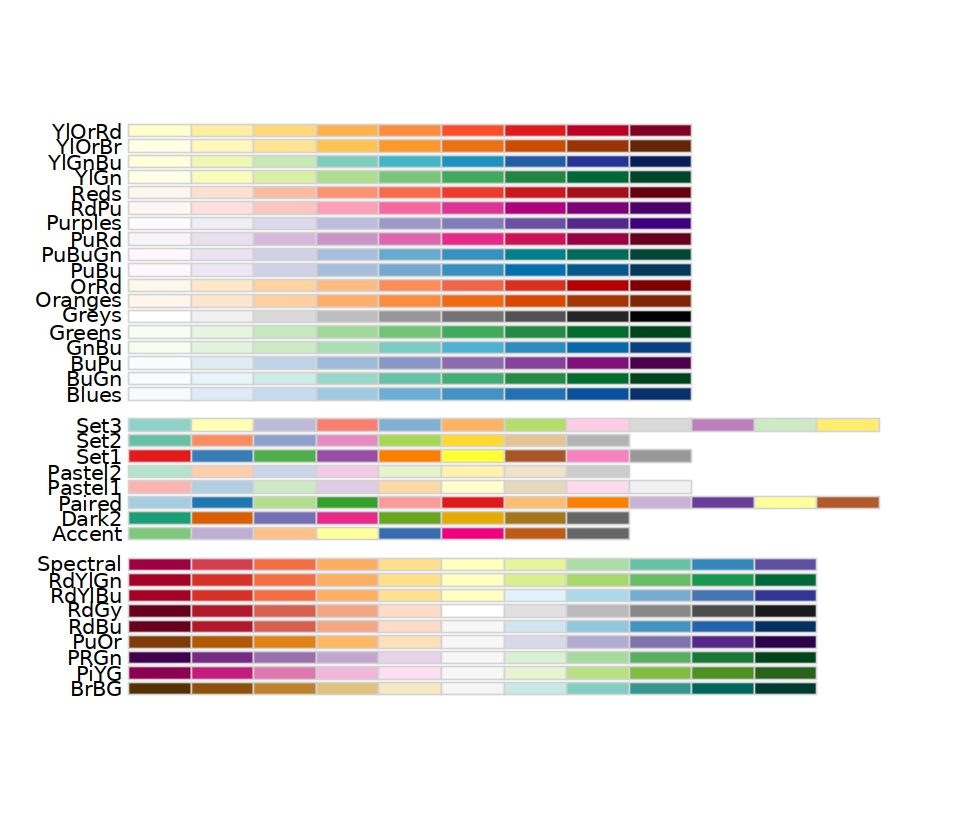

In [130]:
library(ggplot2)
library(RColorBrewer)
display.brewer.all()
color <- brewer.pal(3,"Dark2")
colorl <- rep(color,each=5)
go$Description<- factor(go$Description,levels=go$Description)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


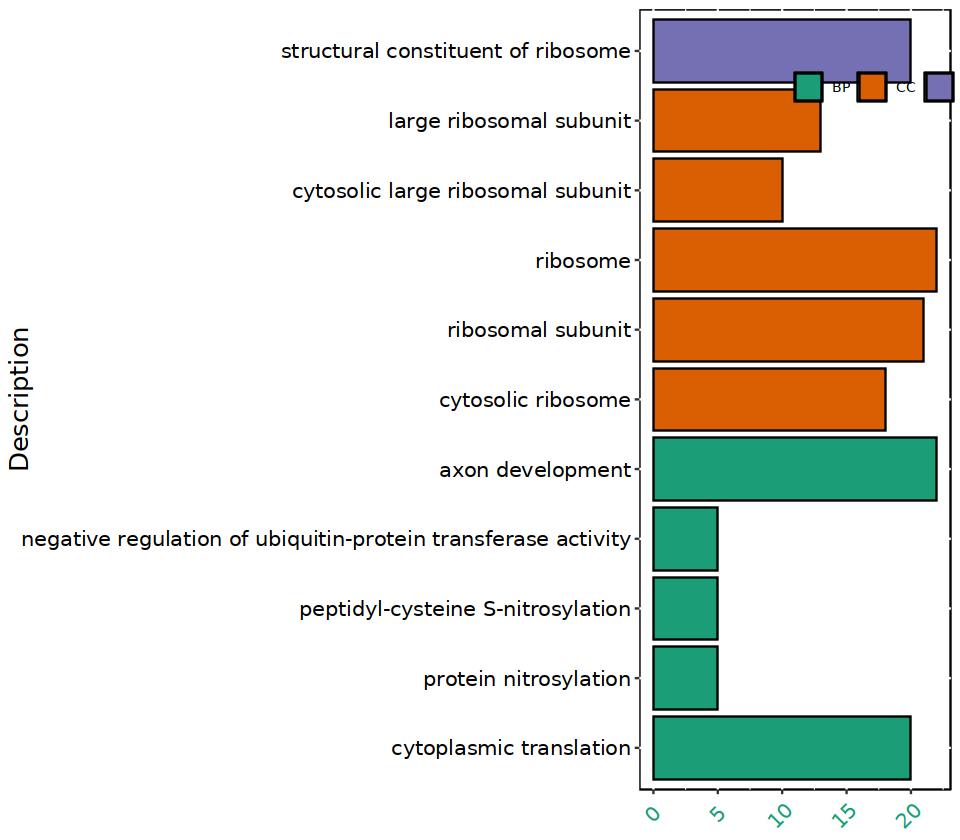

In [131]:
options(repr.plot.width = 8)

ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip() + 
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    
    plot.background = element_blank()
  )


In [132]:
ggsave('Figure1.35sample.GO.pdf',width = 8,height = 8)

### pca

In [133]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/25-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

In [134]:
data = data[!duplicated(data$Gene_name),]

In [135]:

expr = data %>%  tibble::remove_rownames() %>%  dplyr::filter(Gene_name %in%  diff$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name')  
Group = c(rep('con',19),rep('CI',16))
head(expr,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI16,CI1,CI2,CI3,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZNF480,3.046852,2.959276,1.924806,2.086426,2.358436,2.745877,2.273106,3.353977,2.609238,4.410267,...,5.532627,2.837813,4.141639,4.735136,6.489764,2.851674,3.680329,7.985714,4.003843,2.993553
ZNF354A,2.455682,2.209675,1.816189,2.385620,3.191194,3.338612,2.912866,3.386982,3.372144,4.032410,...,4.964052,5.852160,2.514873,5.180209,5.847872,4.679571,3.423737,11.670074,4.470493,4.790598


In [136]:
library(tinyarray)

In [137]:
#cg=names(tail(sort(apply(expr,1,sd)),3000))
cg = jiaoji$GeneName
n=expr[cg,]

In [138]:
n = n [which(rowSums(n) > 0),]

In [139]:
pca.res <- prcomp(t(n), scale. = T, center = T)
pca.res

Standard deviations (1, .., p=35):
 [1] 1.276520e+01 7.402311e+00 6.559172e+00 4.343033e+00 3.353443e+00
 [6] 2.906494e+00 2.751910e+00 2.536582e+00 2.254462e+00 2.210307e+00
[11] 2.182645e+00 2.050410e+00 2.001940e+00 1.948563e+00 1.887539e+00
[16] 1.761679e+00 1.744161e+00 1.689736e+00 1.631034e+00 1.584768e+00
[21] 1.562547e+00 1.500187e+00 1.492613e+00 1.402207e+00 1.347807e+00
[26] 1.288490e+00 1.284930e+00 1.222453e+00 1.180314e+00 1.107787e+00
[31] 1.065517e+00 1.055257e+00 9.875964e-01 9.170285e-01 5.668889e-15

Rotation (n x k) = (380 x 35):
                        PC1           PC2           PC3           PC4
CYP26B1       -0.0065332567  0.0596199128 -0.0226771281  3.355131e-02
BZRAP1        -0.0433131779  0.0842658230 -0.0338139782  5.289310e-02
MPO           -0.0180384675  0.0011187667  0.0022921514 -3.653655e-02
OSBPL7        -0.0408949925  0.0988201653 -0.0104155863 -3.696434e-02
CCL3          -0.0286942780  0.0728219745 -0.0173315501  4.772208e-02
PROM1          0.026789

In [140]:
tmp <- as.data.frame(pca.res$x)
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,-11.587498,0.2321595,0.2274395,-2.1140877,4.6922888,-1.3957333,2.334840,-2.562616015,0.7697882,-1.9069176,...,0.004066203,1.838376605,-1.23055275,-2.5966008,-0.8045068,0.2276241,1.12495386,1.13224589,-0.19738865,-1.637579e-15
C11,-5.978884,1.0105169,-1.4854099,-0.1522032,-2.8973013,-0.4589674,-2.094369,-0.007153611,-2.9323830,-1.5746096,...,-0.895600421,-0.002857045,-0.06458174,-2.8060351,1.2969146,-2.5740554,0.39302070,-0.83741077,2.27547625,-2.026157e-15
C12,-11.416054,-8.4269449,2.3644222,-2.3769872,4.0296026,-0.6488867,-1.266854,-1.357930750,-0.8230378,-3.1443216,...,-2.823596515,2.789125109,2.14658842,1.6507141,-1.2001617,-0.3757858,-0.72653446,-0.90147004,-0.92460028,-1.332268e-15
C13,-14.053109,-0.4987370,0.2268661,1.9523367,-0.4072087,-6.6873836,6.229783,-1.182261328,-3.4557277,-0.3262381,...,-1.189195782,-1.722326062,-1.65247796,1.2417781,0.4321684,-0.2794619,0.34993947,0.08513257,0.12656209,-2.720046e-15
C14,-10.750976,1.4199292,-1.5130811,2.9446058,-1.7370375,-1.7062481,2.258009,-0.888464872,-0.6107660,0.5683565,...,2.609660784,1.430084929,1.71631763,1.8391084,-2.6117914,-1.7212967,-1.53158405,-0.31996291,1.12507072,-2.442491e-15
C15,-11.191160,5.8742214,-2.8750537,0.9792625,-2.2059706,1.6959903,2.286202,-1.100988682,-1.2425962,-1.9802307,...,1.728836167,0.622784956,-0.41164781,0.5278076,0.7839094,0.5665421,-0.02366571,1.36480944,-0.06032634,1.665335e-16


In [141]:
tmp$group <- Group
head(tmp)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C10,-11.587498,0.2321595,0.2274395,-2.1140877,4.6922888,-1.3957333,2.334840,-2.562616015,0.7697882,-1.9069176,...,1.838376605,-1.23055275,-2.5966008,-0.8045068,0.2276241,1.12495386,1.13224589,-0.19738865,-1.637579e-15,con
C11,-5.978884,1.0105169,-1.4854099,-0.1522032,-2.8973013,-0.4589674,-2.094369,-0.007153611,-2.9323830,-1.5746096,...,-0.002857045,-0.06458174,-2.8060351,1.2969146,-2.5740554,0.39302070,-0.83741077,2.27547625,-2.026157e-15,con
C12,-11.416054,-8.4269449,2.3644222,-2.3769872,4.0296026,-0.6488867,-1.266854,-1.357930750,-0.8230378,-3.1443216,...,2.789125109,2.14658842,1.6507141,-1.2001617,-0.3757858,-0.72653446,-0.90147004,-0.92460028,-1.332268e-15,con
C13,-14.053109,-0.4987370,0.2268661,1.9523367,-0.4072087,-6.6873836,6.229783,-1.182261328,-3.4557277,-0.3262381,...,-1.722326062,-1.65247796,1.2417781,0.4321684,-0.2794619,0.34993947,0.08513257,0.12656209,-2.720046e-15,con
C14,-10.750976,1.4199292,-1.5130811,2.9446058,-1.7370375,-1.7062481,2.258009,-0.888464872,-0.6107660,0.5683565,...,1.430084929,1.71631763,1.8391084,-2.6117914,-1.7212967,-1.53158405,-0.31996291,1.12507072,-2.442491e-15,con
C15,-11.191160,5.8742214,-2.8750537,0.9792625,-2.2059706,1.6959903,2.286202,-1.100988682,-1.2425962,-1.9802307,...,0.622784956,-0.41164781,0.5278076,0.7839094,0.5665421,-0.02366571,1.36480944,-0.06032634,1.665335e-16,con


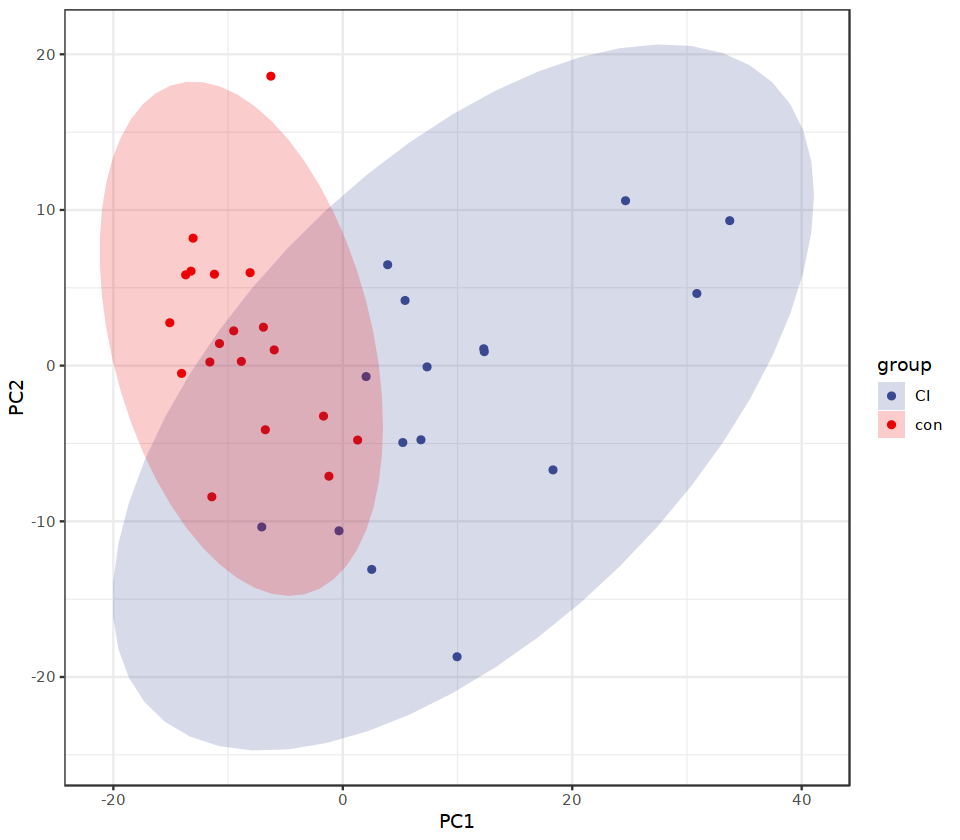

In [142]:
library(ggplot2)
library(ggsci)

ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()

In [143]:
ggsave('Figure1.35sample.pca.pdf',width = 8,height = 8)